In [1]:
#importing all the required libraies
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('cpdata.csv')
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [4]:
df.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [6]:
df.shape

(3100, 5)

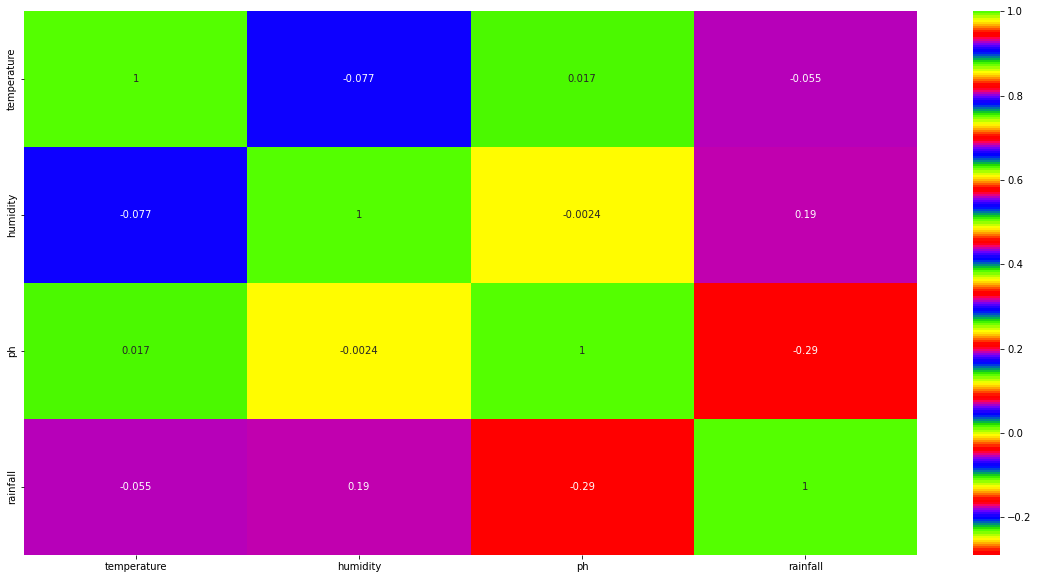

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='prism')
plt.show()

In [14]:
df.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [18]:
df['label'].unique()

array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [129]:
df['label']=df['label'].str.strip()
for i in range(len(df['label'])):
    df['label'][i]=df['label'][i].replace(' ','')
df['label'].unique()

array(['rice', 'wheat', 'MungBean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'GroundNut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'KidneyBeans', 'MothBeans', 'Coconut',
       'Blackgram', 'AdzukiBeans', 'PigeonPeas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [130]:
df['label'].value_counts()

rice           100
MothBeans      100
pomegranate    100
papaya         100
orange         100
muskmelon      100
mango          100
apple          100
grapes         100
banana         100
Chickpea       100
PigeonPeas     100
AdzukiBeans    100
Blackgram      100
Coconut        100
KidneyBeans    100
wheat          100
Tobacco        100
Sugarcane      100
Rubber         100
Peas           100
GroundNut      100
Cotton         100
Coffee         100
Jute           100
Lentil         100
maize          100
millet         100
Tea            100
MungBean       100
watermelon     100
Name: label, dtype: int64

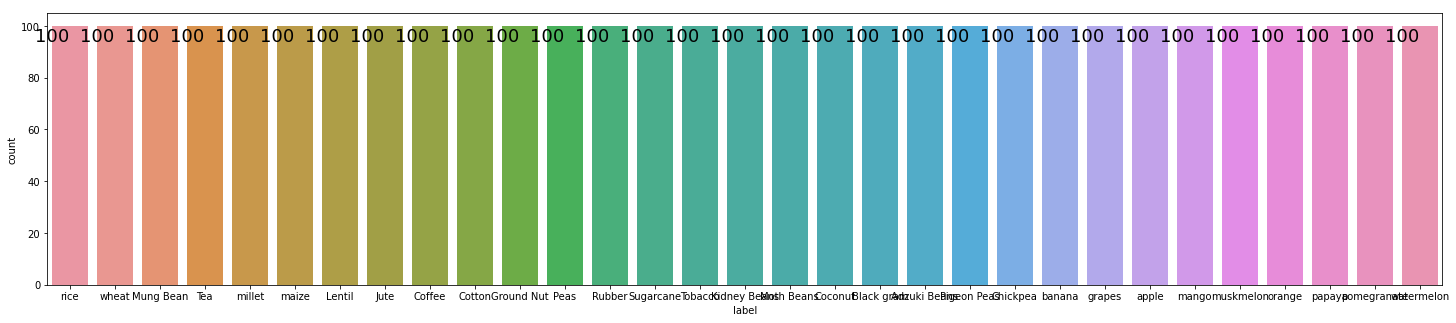

In [20]:
plt.figure(figsize=(25,5))
ax=sns.countplot(df['label'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x(),p.get_height()),ha='center',va='center',color='#000000',size=18)
plt.show()

In [132]:
df.columns

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Separate the dependent and independent feature

In [21]:
X=df[['temperature', 'humidity', 'ph', 'rainfall']]
y=df['label']
print('='*20,'X','='*20)
print(X.head())
print('='*5,'y','='*5)
print(y.head())

==================== X ====================
   temperature   humidity        ph    rainfall
0    20.879744  82.002744  6.502985  202.935536
1    21.770462  80.319644  7.038096  226.655537
2    23.004459  82.320763  7.840207  263.964248
3    26.491096  80.158363  6.980401  242.864034
4    20.130175  81.604873  7.628473  262.717340
===== y =====
0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


# spiliting the data into training and testing set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3100, 5)
(2325, 4)
(775, 4)
(2325,)
(775,)


# build the model

In [25]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred=model.predict(X_test)
y_pred

array(['Sugarcane', 'pomegranate', 'Black gram', 'Moth Beans', 'Peas',
       'Pigeon Peas', 'mango', 'Tobacco', 'Tea', 'Coconut', 'maize',
       'Mung Bean', 'Lentil', 'muskmelon', 'papaya', 'Cotton', 'banana',
       'Lentil', 'mango', 'Tobacco', 'orange', 'millet', 'Rubber',
       'Mung Bean', 'muskmelon', 'pomegranate', 'pomegranate', 'millet',
       'mango', 'maize', 'Black gram', 'Coconut', 'Pigeon Peas', 'Lentil',
       'Rubber', 'grapes', 'Kidney Beans', 'wheat', 'mango',
       'Kidney Beans', 'papaya', 'grapes', 'Tea', 'Tobacco',
       'Adzuki Beans', 'orange', 'Black gram', 'Pigeon Peas', 'apple',
       'pomegranate', 'Ground Nut', 'Mung Bean', 'grapes', 'Pigeon Peas',
       'papaya', 'wheat', 'maize', 'wheat', 'Tobacco', 'millet',
       'Tobacco', 'Sugarcane', 'orange', 'apple', 'millet', 'Black gram',
       'orange', 'pomegranate', 'Mung Bean', 'watermelon', 'Kidney Beans',
       'Tobacco', 'Mung Bean', 'Jute', 'Mung Bean', 'grapes', 'mango',
       'orange', 'To

In [27]:
A=accuracy_score(y_test,y_pred)
A

0.9574193548387097

In [29]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        24
  Black gram       1.00      1.00      1.00        21
    Chickpea       1.00      1.00      1.00        20
     Coconut       1.00      1.00      1.00        24
      Coffee       0.83      0.96      0.89        26
      Cotton       1.00      0.94      0.97        16
  Ground Nut       0.92      1.00      0.96        23
        Jute       0.95      0.86      0.90        22
Kidney Beans       1.00      1.00      1.00        19
      Lentil       0.96      1.00      0.98        22
  Moth Beans       1.00      0.86      0.93        22
   Mung Bean       1.00      1.00      1.00        32
        Peas       1.00      1.00      1.00        25
 Pigeon Peas       1.00      0.87      0.93        23
      Rubber       1.00      0.96      0.98        28
   Sugarcane       0.91      0.91      0.91        23
         Tea       0.96      1.00      0.98        24
     Tobacco       0.93    

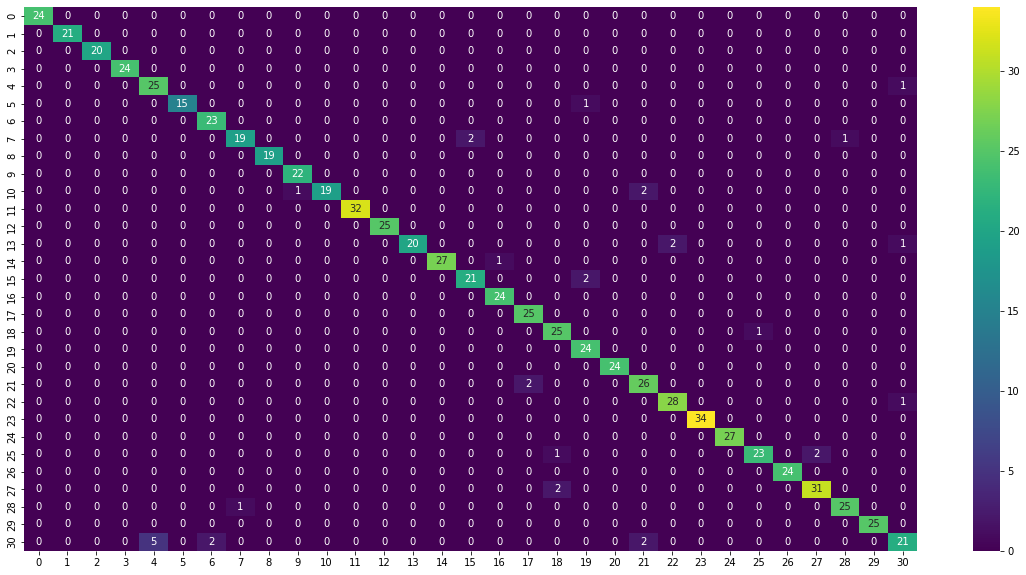

In [30]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

In [28]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [31]:
X_test[90:100]

,temperature,humidity,ph,rainfall
1842,34.638810,61.385979,7.699507,72.431691
2308,12.756796,81.624974,6.130310,66.778446
1601,27.322206,51.278688,4.371746,36.503791
937,23.643284,78.125867,6.105398,80.961573
354,25.324908,55.660815,4.633436,246.400403
978,25.530827,80.046628,5.801048,99.395572
1091,32.345415,66.037988,6.106239,111.360069
44,26.313555,82.366990,7.224286,265.535594
1963,52.996494,46.124633,6.221552,151.215373
2225,29.104035,79.195886,6.324270,92.078358


In [141]:
y_test[90:100]

1842      Blackgram
2308         grapes
1601      MothBeans
937          Cotton
354             Tea
978          Cotton
1091      GroundNut
44             rice
1963    AdzukiBeans
2225         banana
Name: label, dtype: object